In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
df=pd.read_csv("Melbourne_housing_FULL.csv")  #reading csv file

In [ ]:
df.head()  #take a look at the first 5 rows of data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


DATA OVERVIEW

---



In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)              #(row,column)
    print("##################### Types #####################")
    print(dataframe.dtypes)             #dtypes
    print("##################### Head #####################")
    print(dataframe.head(head))         #first 5 row
    print("##################### Tail #####################")
    print(dataframe.tail(head))         #last 5 row
    print("##################### NA #####################")
    print(dataframe.isnull().sum())     #missing values
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(34857, 21)
##################### Types #####################
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
##################### Head #####################
       Suburb             Address  Rooms Type       Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford       68 Studley St      2    h         

Memory Usage and Range Index

---



In [ ]:
#Calculate memory usage of dataframe

memory_usage = df.memory_usage(deep=True)
print(f"Memory Usage: {memory_usage}")

#The index determines how data is sorted and accessed in rows. The index of Pandas dataframes is often used to uniquely identify rows.

range_index = df.index
print(f"\n\nRange Index:{range_index}")

Memory Usage: Index                128
Suburb           2329116
Address          2459209
Rooms             278856
Type             2021706
Price             278856
Method           2036646
SellerG          2206153
Date             2325476
Distance          278856
Postcode          278856
Bedroom2          278856
Bathroom          278856
Car               278856
Landsize          278856
BuildingArea      278856
YearBuilt         278856
CouncilArea      2744297
Lattitude         278856
Longtitude        278856
Regionname       2713700
Propertycount     278856
dtype: int64


Range Index:RangeIndex(start=0, stop=34857, step=1)


So, Index length are 34857 !

**Exploratory Data Analysis (EDA)**

---



In [ ]:
#Gives the names of categorical, numerical, and categorical but cardinal variables in the data set. This is very important.

def grab_col_names(dataframe, cat_th=10,  car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    #There are variables that are categorical even though they look numeric.
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    #More than 20 columns with data type "category" or "object" (categorical variables with high cardinality)
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("##########VARIABLES##########")
    print(f"cat_cols: {cat_cols}\nnum_cols: {num_cols}\ncat_but_car: {cat_but_car}")

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 34857
Variables: 21
cat_cols: 3
num_cols: 13
cat_but_car: 5
num_but_cat: 0
##########VARIABLES##########
cat_cols: ['Type', 'Method', 'Regionname']
num_cols: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
cat_but_car: ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


Categorical Variables

---



In [ ]:
def cat_summary(dataframe, col_name, plot= False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()

    Type  Ratio
h  23980 68.795
u   7297 20.934
t   3580 10.271
##########################################


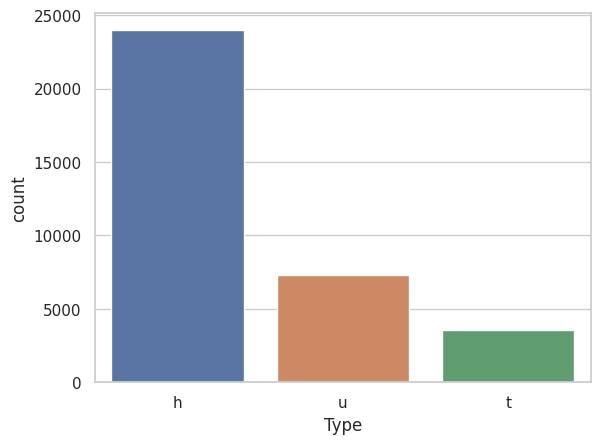

    Method  Ratio
S    19744 56.643
SP    5095 14.617
PI    4850 13.914
VB    3108  8.916
SN    1317  3.778
PN     308  0.884
SA     226  0.648
W      173  0.496
SS      36  0.103
##########################################


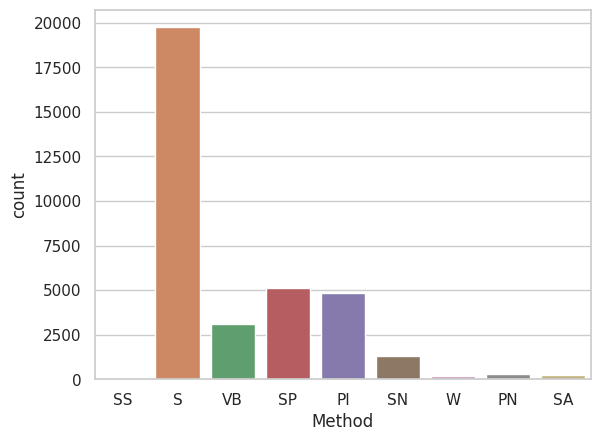

                            Regionname  Ratio
Southern Metropolitan            11836 33.956
Northern Metropolitan             9557 27.418
Western Metropolitan              6799 19.505
Eastern Metropolitan              4377 12.557
South-Eastern Metropolitan        1739  4.989
Eastern Victoria                   228  0.654
Northern Victoria                  203  0.582
Western Victoria                   115  0.330
##########################################


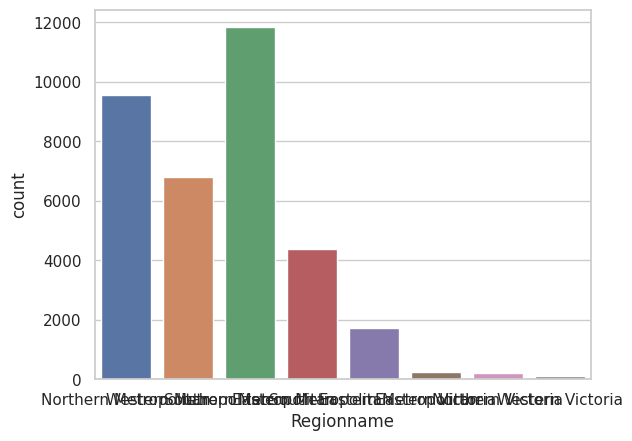

In [ ]:
for col in cat_cols:
    cat_summary(df,col,plot=True)

Numerical Variables

---



In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   34857.000
mean        3.031
std         0.970
min         1.000
5%          2.000
10%         2.000
20%         2.000
30%         3.000
40%         3.000
50%         3.000
60%         3.000
70%         3.000
80%         4.000
90%         4.000
95%         5.000
99%         5.000
max        16.000
Name: Rooms, dtype: float64


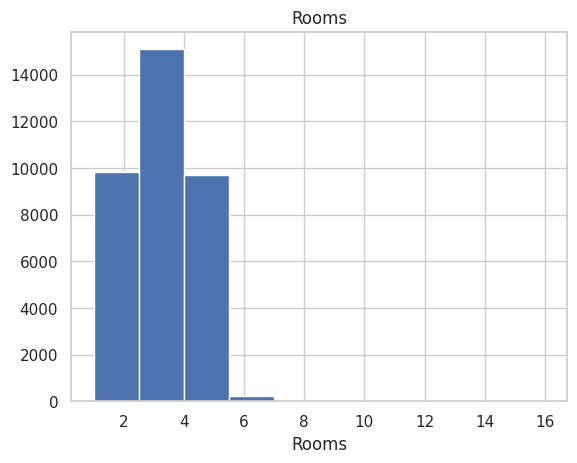

count      27247.000
mean     1050173.345
std       641467.130
min        85000.000
5%        415000.000
10%       485300.000
20%       594600.000
30%       678000.000
40%       770000.000
50%       870000.000
60%      1000000.000
70%      1200000.000
80%      1400000.000
90%      1800000.000
95%      2250000.000
99%      3400540.000
max     11200000.000
Name: Price, dtype: float64


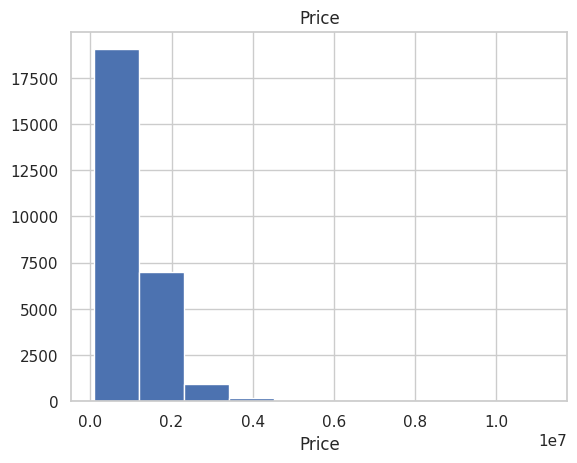

count   34856.000
mean       11.185
std         6.789
min         0.000
5%          2.700
10%         3.800
20%         5.600
30%         7.300
40%         8.500
50%        10.300
60%        11.400
70%        13.400
80%        14.800
90%        19.900
95%        24.700
99%        35.400
max        48.100
Name: Distance, dtype: float64


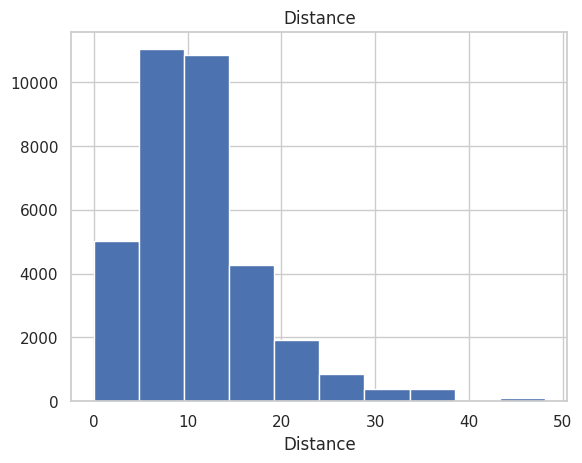

count   34856.000
mean     3116.063
std       109.024
min      3000.000
5%       3015.000
10%      3024.000
20%      3042.000
30%      3058.000
40%      3073.000
50%      3103.000
60%      3125.000
70%      3146.000
80%      3168.000
90%      3190.000
95%      3204.000
99%      3754.000
max      3978.000
Name: Postcode, dtype: float64


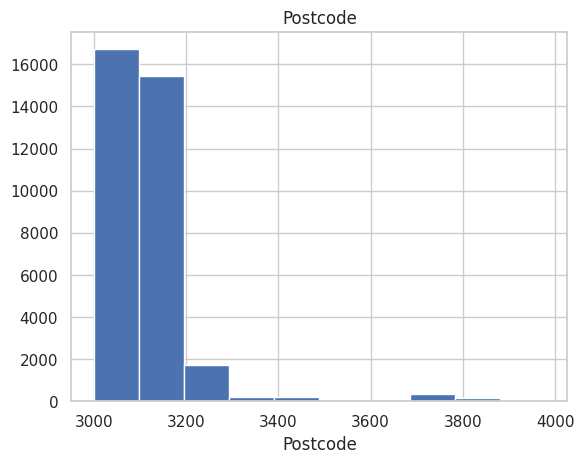

count   26640.000
mean        3.085
std         0.981
min         0.000
5%          2.000
10%         2.000
20%         2.000
30%         3.000
40%         3.000
50%         3.000
60%         3.000
70%         4.000
80%         4.000
90%         4.000
95%         5.000
99%         5.000
max        30.000
Name: Bedroom2, dtype: float64


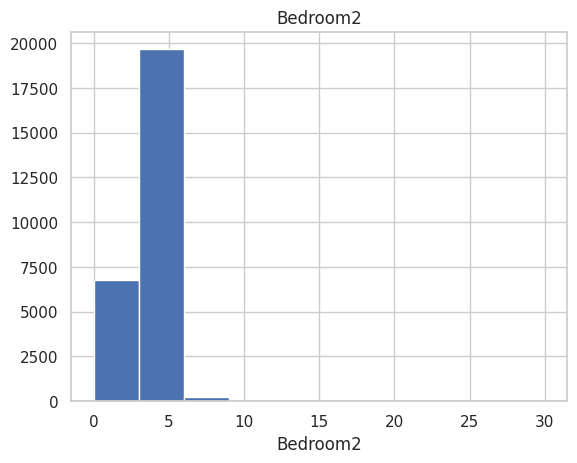

count   26631.000
mean        1.625
std         0.724
min         0.000
5%          1.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         2.000
60%         2.000
70%         2.000
80%         2.000
90%         2.000
95%         3.000
99%         4.000
max        12.000
Name: Bathroom, dtype: float64


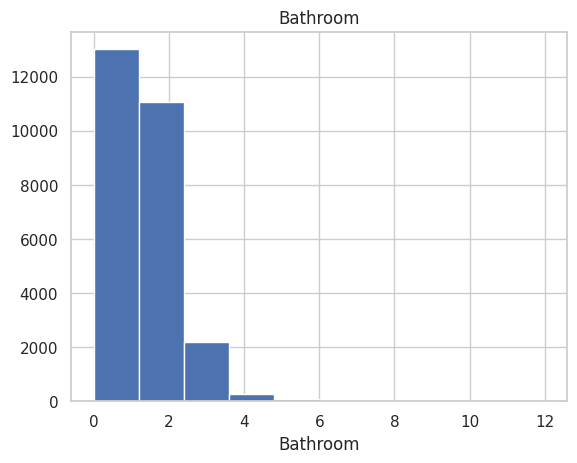

count   26129.000
mean        1.729
std         1.011
min         0.000
5%          0.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         2.000
60%         2.000
70%         2.000
80%         2.000
90%         3.000
95%         4.000
99%         5.000
max        26.000
Name: Car, dtype: float64


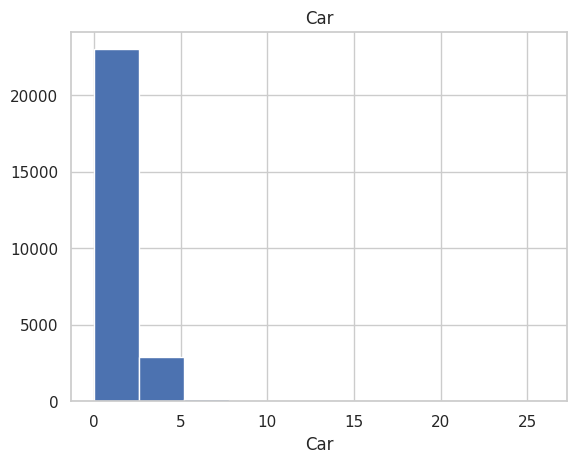

count    23047.000
mean       593.599
std       3398.842
min          0.000
5%           0.000
10%          0.000
20%        179.000
30%        276.000
40%        385.000
50%        521.000
60%        587.000
70%        648.000
80%        702.000
90%        824.000
95%       1001.000
99%       2942.120
max     433014.000
Name: Landsize, dtype: float64


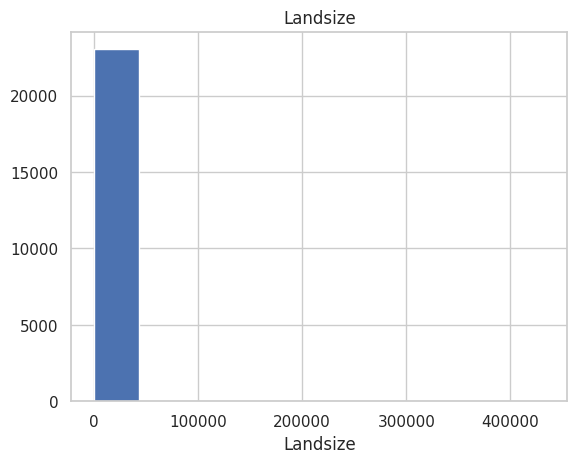

count   13742.000
mean      160.256
std       401.267
min         0.000
5%         56.000
10%        73.000
20%        94.000
30%       109.000
40%       121.000
50%       136.000
60%       153.000
70%       175.000
80%       204.000
90%       258.000
95%       310.000
99%       473.180
max     44515.000
Name: BuildingArea, dtype: float64


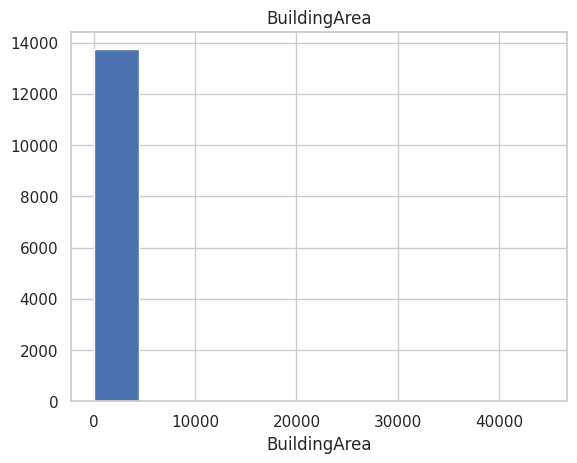

count   15551.000
mean     1965.290
std        37.328
min      1196.000
5%       1900.000
10%      1910.000
20%      1930.000
30%      1950.000
40%      1960.000
50%      1970.000
60%      1980.000
70%      1993.000
80%      2003.000
90%      2010.000
95%      2013.000
99%      2016.000
max      2106.000
Name: YearBuilt, dtype: float64


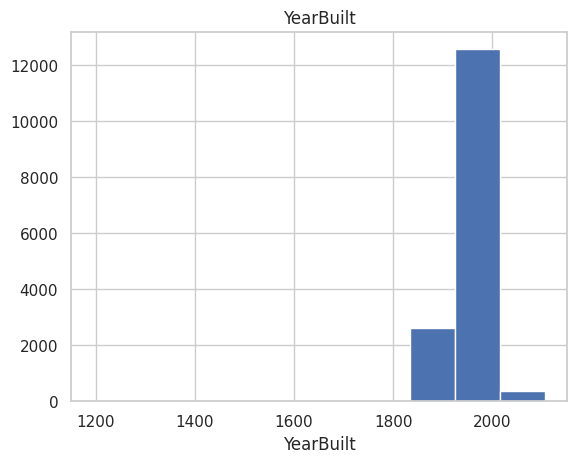

count   26881.000
mean      -37.811
std         0.090
min       -38.190
5%        -37.949
10%       -37.919
20%       -37.879
30%       -37.852
40%       -37.831
50%       -37.808
60%       -37.787
70%       -37.766
80%       -37.740
90%       -37.707
95%       -37.675
99%       -37.586
max       -37.390
Name: Lattitude, dtype: float64


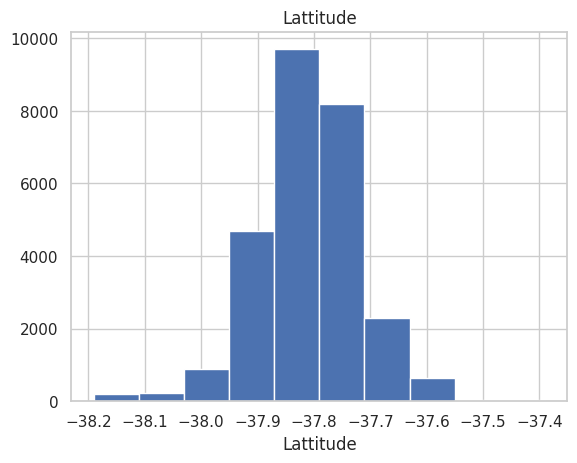

count   26881.000
mean      145.002
std         0.120
min       144.424
5%        144.800
10%       144.868
20%       144.912
30%       144.954
40%       144.988
50%       145.008
60%       145.033
70%       145.058
80%       145.087
90%       145.137
95%       145.188
99%       145.292
max       145.526
Name: Longtitude, dtype: float64


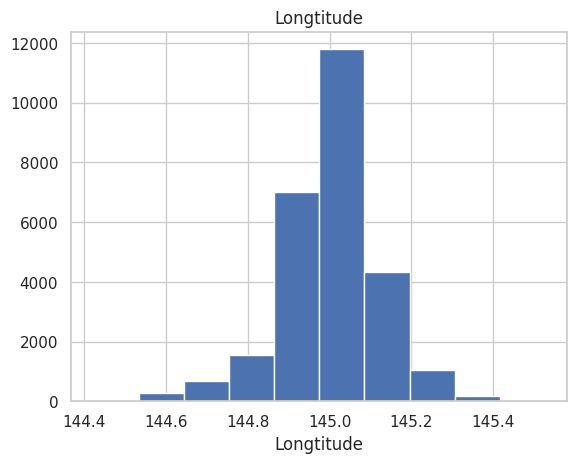

count   34854.000
mean     7572.888
std      4428.090
min        83.000
5%       2185.000
10%      2674.000
20%      3650.000
30%      4836.000
40%      5556.000
50%      6763.000
60%      7809.000
70%      8989.000
80%     10969.000
90%     14577.000
95%     15510.000
99%     21650.000
max     21650.000
Name: Propertycount, dtype: float64


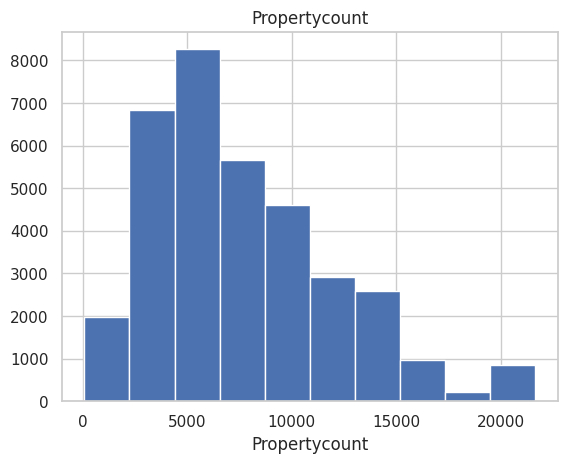

In [ ]:
for col in num_cols:
  num_summary(df, col, plot=True)

Missing Values

In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
#Remove duplicate lines

df.drop_duplicates(inplace=True)

#Fill in missing values (NaN) in categorical variables with mode.
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode().iloc[0])

In [ ]:

df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Outlier Thresholds

In [ ]:
def check_outlier(df, col_name, threshold=3):

    z_scores = (df[col_name] - df[col_name].mean()) / df[col_name].std()

    #Check and return outliers based on threshold
    if (np.abs(z_scores) > threshold).any():
        return True
    else:
        return False

In [ ]:
for col in num_cols:
  print(col, check_outlier(df, col))

Rooms True
Price True
Distance True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude True
Longtitude True
Propertycount True


count   8887.000
mean       3.099
std        0.964
min        1.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        4.000
80%        4.000
90%        4.000
95%        5.000
99%        5.000
max       12.000
Name: Rooms, dtype: float64


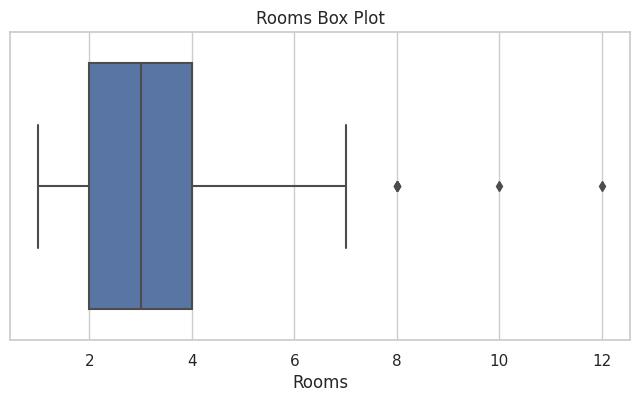

count      8887.000
mean    1092901.629
std      679381.904
min      131000.000
5%       417650.000
10%      490000.000
20%      600000.000
30%      690000.000
40%      790000.000
50%      900000.000
60%     1050000.000
70%     1250000.000
80%     1479800.000
90%     1900000.000
95%     2370700.000
99%     3550000.000
max     9000000.000
Name: Price, dtype: float64


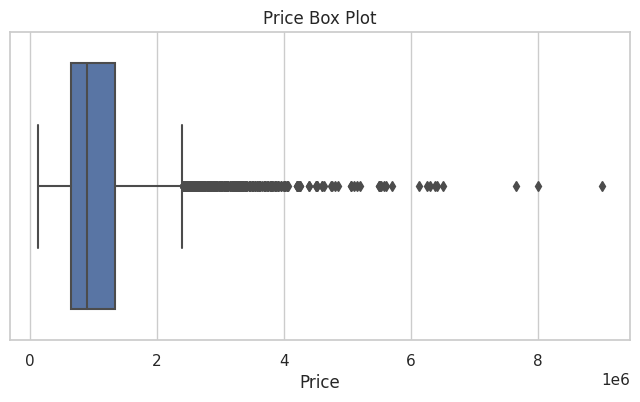

count   8887.000
mean      11.200
std        6.813
min        0.000
5%         2.600
10%        4.200
20%        5.900
30%        7.200
40%        8.400
50%       10.200
60%       11.400
70%       13.400
80%       14.700
90%       19.900
95%       24.700
99%       35.400
max       47.400
Name: Distance, dtype: float64


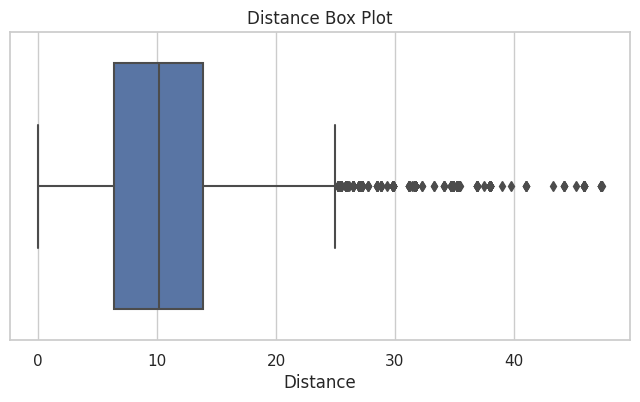

count   8887.000
mean    3111.663
std      112.614
min     3000.000
5%      3013.000
10%     3020.000
20%     3039.000
30%     3054.000
40%     3070.000
50%     3084.000
60%     3121.000
70%     3143.000
80%     3166.000
90%     3189.000
95%     3205.000
99%     3754.000
max     3977.000
Name: Postcode, dtype: float64


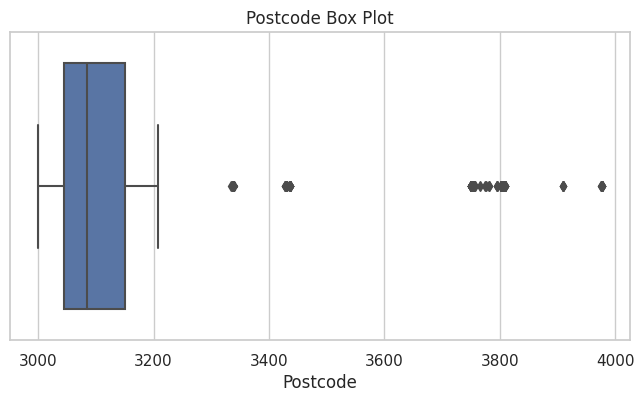

count   8887.000
mean       3.078
std        0.966
min        0.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        4.000
80%        4.000
90%        4.000
95%        5.000
99%        5.000
max       12.000
Name: Bedroom2, dtype: float64


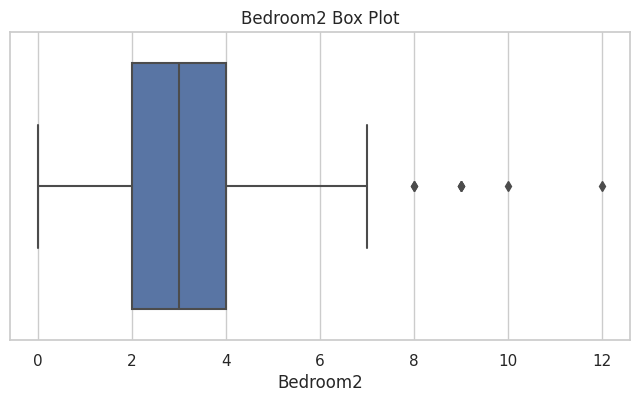

count   8887.000
mean       1.646
std        0.722
min        1.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        2.000
95%        3.000
99%        4.000
max        9.000
Name: Bathroom, dtype: float64


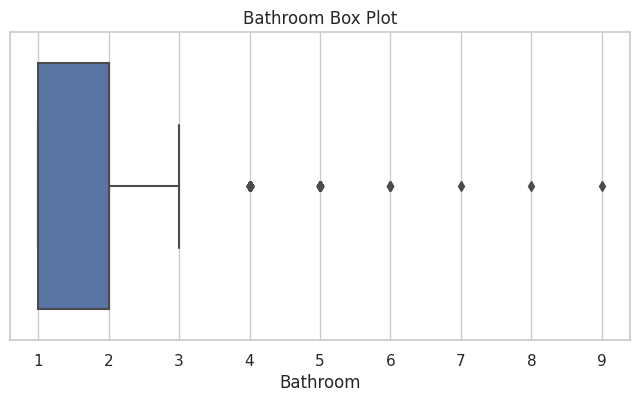

count   8887.000
mean       1.692
std        0.975
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        3.000
95%        4.000
99%        5.000
max       10.000
Name: Car, dtype: float64


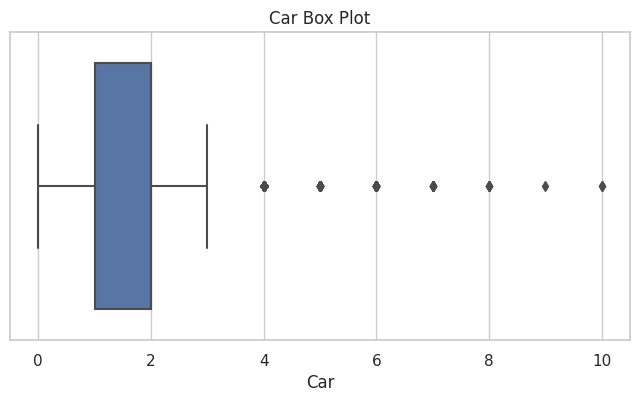

count    8887.000
mean      523.480
std      1061.324
min         0.000
5%          0.000
10%         0.000
20%       166.200
30%       260.000
40%       357.000
50%       478.000
60%       566.000
70%       619.000
80%       688.000
90%       794.000
95%       951.000
99%      2573.940
max     42800.000
Name: Landsize, dtype: float64


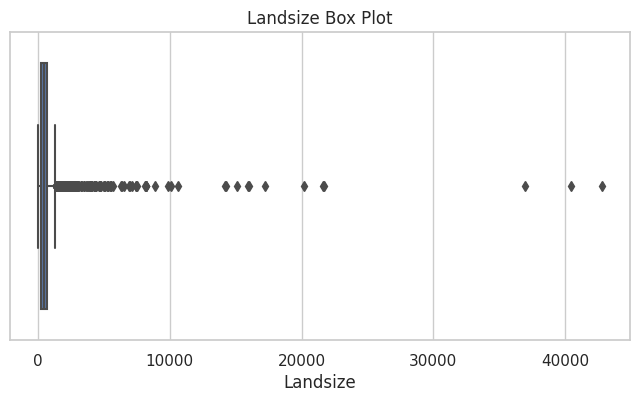

count   8887.000
mean     149.309
std       87.926
min        0.000
5%        57.000
10%       72.000
20%       92.000
30%      106.000
40%      119.000
50%      132.000
60%      148.000
70%      168.000
80%      195.077
90%      244.000
95%      296.000
99%      426.140
max     3112.000
Name: BuildingArea, dtype: float64


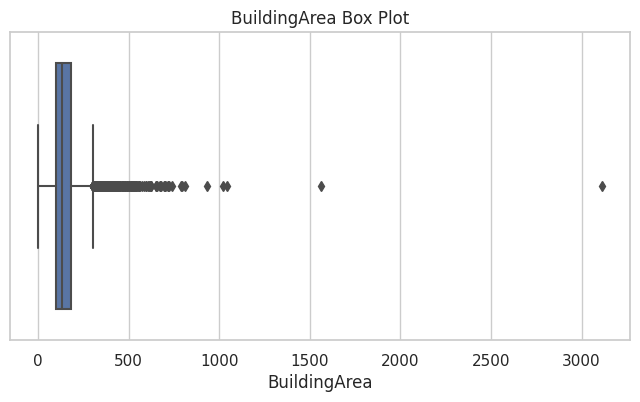

count   8887.000
mean    1965.753
std       37.041
min     1196.000
5%      1900.000
10%     1910.000
20%     1930.000
30%     1950.000
40%     1960.000
50%     1970.000
60%     1980.000
70%     1992.000
80%     2003.000
90%     2010.000
95%     2013.000
99%     2016.000
max     2019.000
Name: YearBuilt, dtype: float64


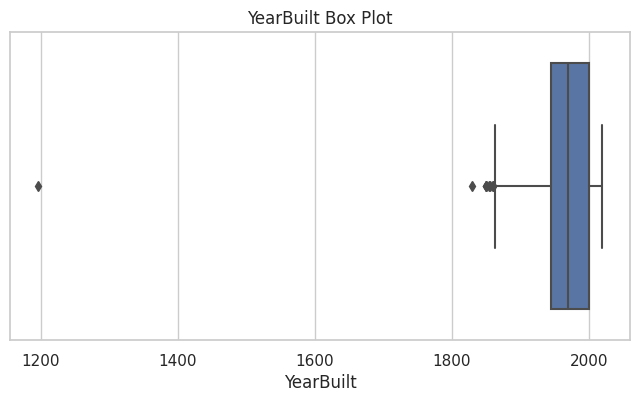

count   8887.000
mean     -37.805
std        0.091
min      -38.174
5%       -37.942
10%      -37.914
20%      -37.874
30%      -37.846
40%      -37.822
50%      -37.799
60%      -37.780
70%      -37.760
80%      -37.736
90%      -37.703
95%      -37.667
99%      -37.582
max      -37.407
Name: Lattitude, dtype: float64


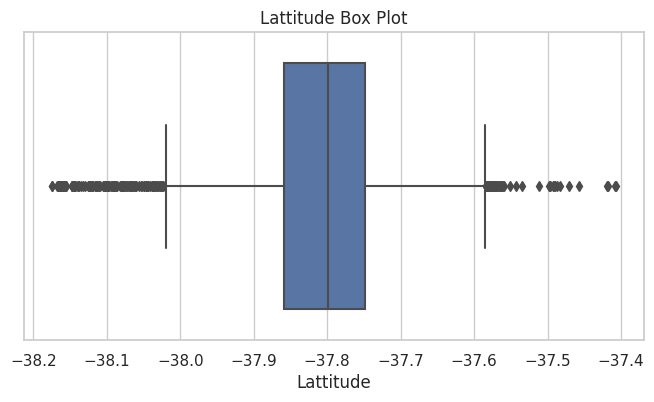

count   8887.000
mean     144.991
std        0.119
min      144.424
5%       144.795
10%      144.867
20%      144.899
30%      144.938
40%      144.973
50%      144.999
60%      145.021
70%      145.050
80%      145.080
90%      145.124
95%      145.172
99%      145.287
max      145.526
Name: Longtitude, dtype: float64


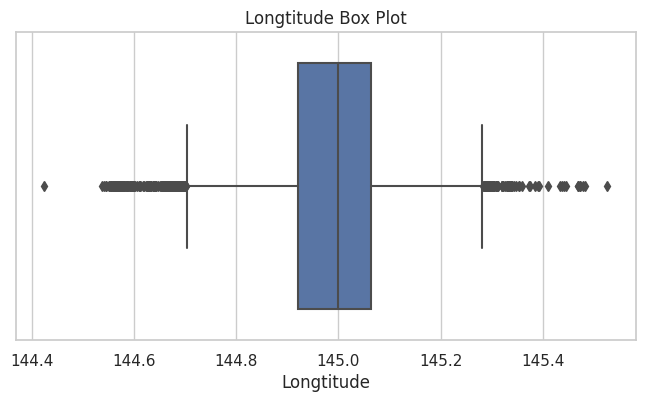

count    8887.000
mean     7475.940
std      4375.024
min       249.000
5%       2019.000
10%      2651.000
20%      3593.000
30%      4864.000
40%      5549.000
50%      6567.000
60%      7717.000
70%      8920.000
80%     10969.000
90%     14092.000
95%     15510.000
99%     21650.000
max     21650.000
Name: Propertycount, dtype: float64


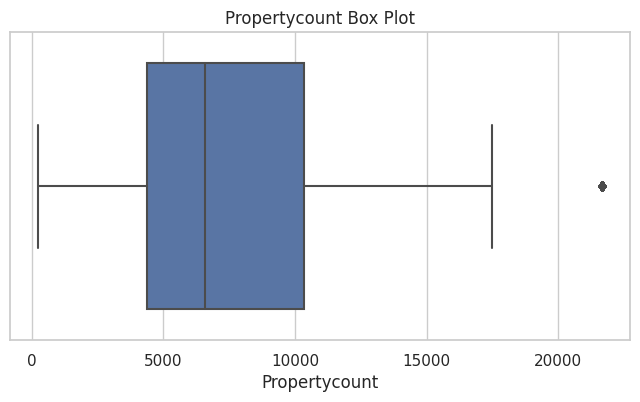

In [ ]:
def num_summary_visualization(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    # Display summary statistics
    summary = dataframe[numerical_col].describe(quantiles).T
    print(summary)

    if plot:
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=dataframe[numerical_col], orient="h")
        plt.xlabel(numerical_col)
        plt.title(f'{numerical_col} Box Plot')
        plt.show()

for col in num_cols:
  if check_outlier(df, col) == True:
    num_summary_visualization(df, col, plot=True)

Examine the outliers according to the box plots, it is clear that the outliers do not have the same effect for each variable of the entire data set. Outliers may be inherent in some variables and should therefore be handled with caution. Two variables stand out as having these unnatural outliers. So it should remove outliers in the "Landsize" and "BuildingArea" variables.

In [ ]:
from scipy.stats import zscore

To remove outliers:

*  Z-scores are calculated for 'Landsize' and 'BuildingArea' columns.
*  A threshold value of z-scores is determined to identify outliers. Although this threshold value is generally set as 3, a different value can be selected optionally.
*  Row indices containing z-scores exceeding the threshold value are stored in an array (outlier_indices).
*  Next, we remove outliers from the dataframe using the indices from the outlier_indices array.

In [ ]:
z_scores = zscore(df[['Landsize', 'BuildingArea']])
z_threshold = 3
outlier_indices = np.where(np.abs(z_scores) > z_threshold)
outlier_indices = outlier_indices[0]
df_clean = df.drop(df.index[outlier_indices])




* After removing the outliers, a new dataframe is created by resetting the index of the dataframe.
* Finally, if you want to show how effective the removal of outliers is on the data frame, the size of the data frame initially (df.shape) and the size of the newly created data frame after removing the outliers (df_clean.shape) can be examined.



In [ ]:
# Reset the index of the modified DataFrame
df_clean = df_clean.reset_index(drop=True)
print("df:",df.shape)
print("df_clean:",df_clean.shape)

df: (8887, 21)
df_clean: (8724, 21)


DATA VISUALIZATION

---



In [ ]:
import matplotlib.pyplot as plt

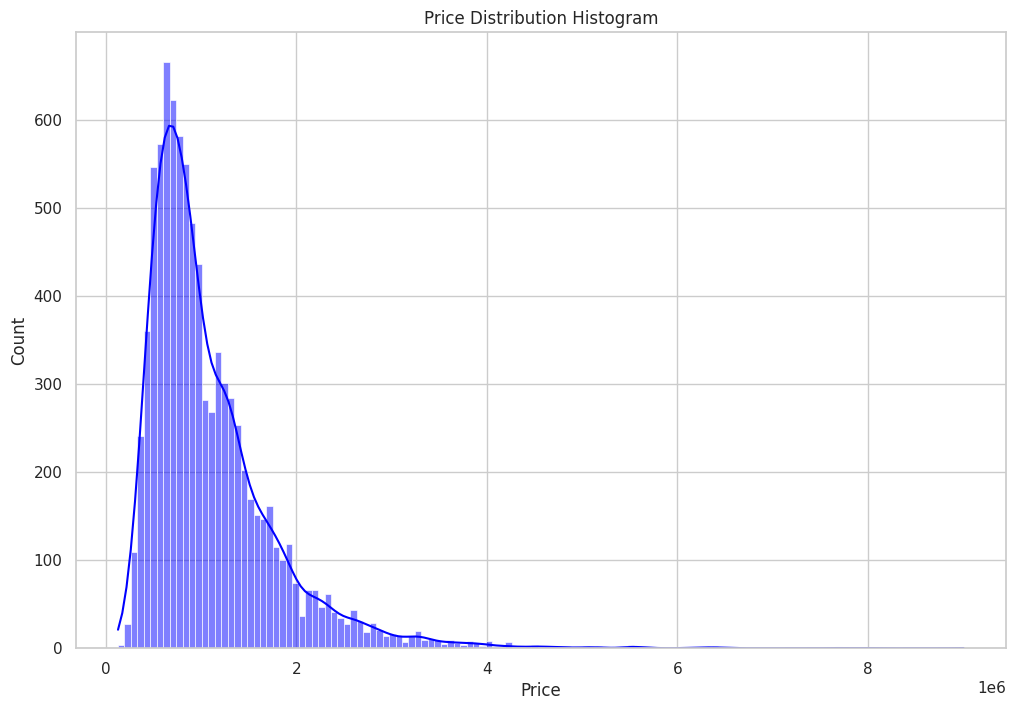

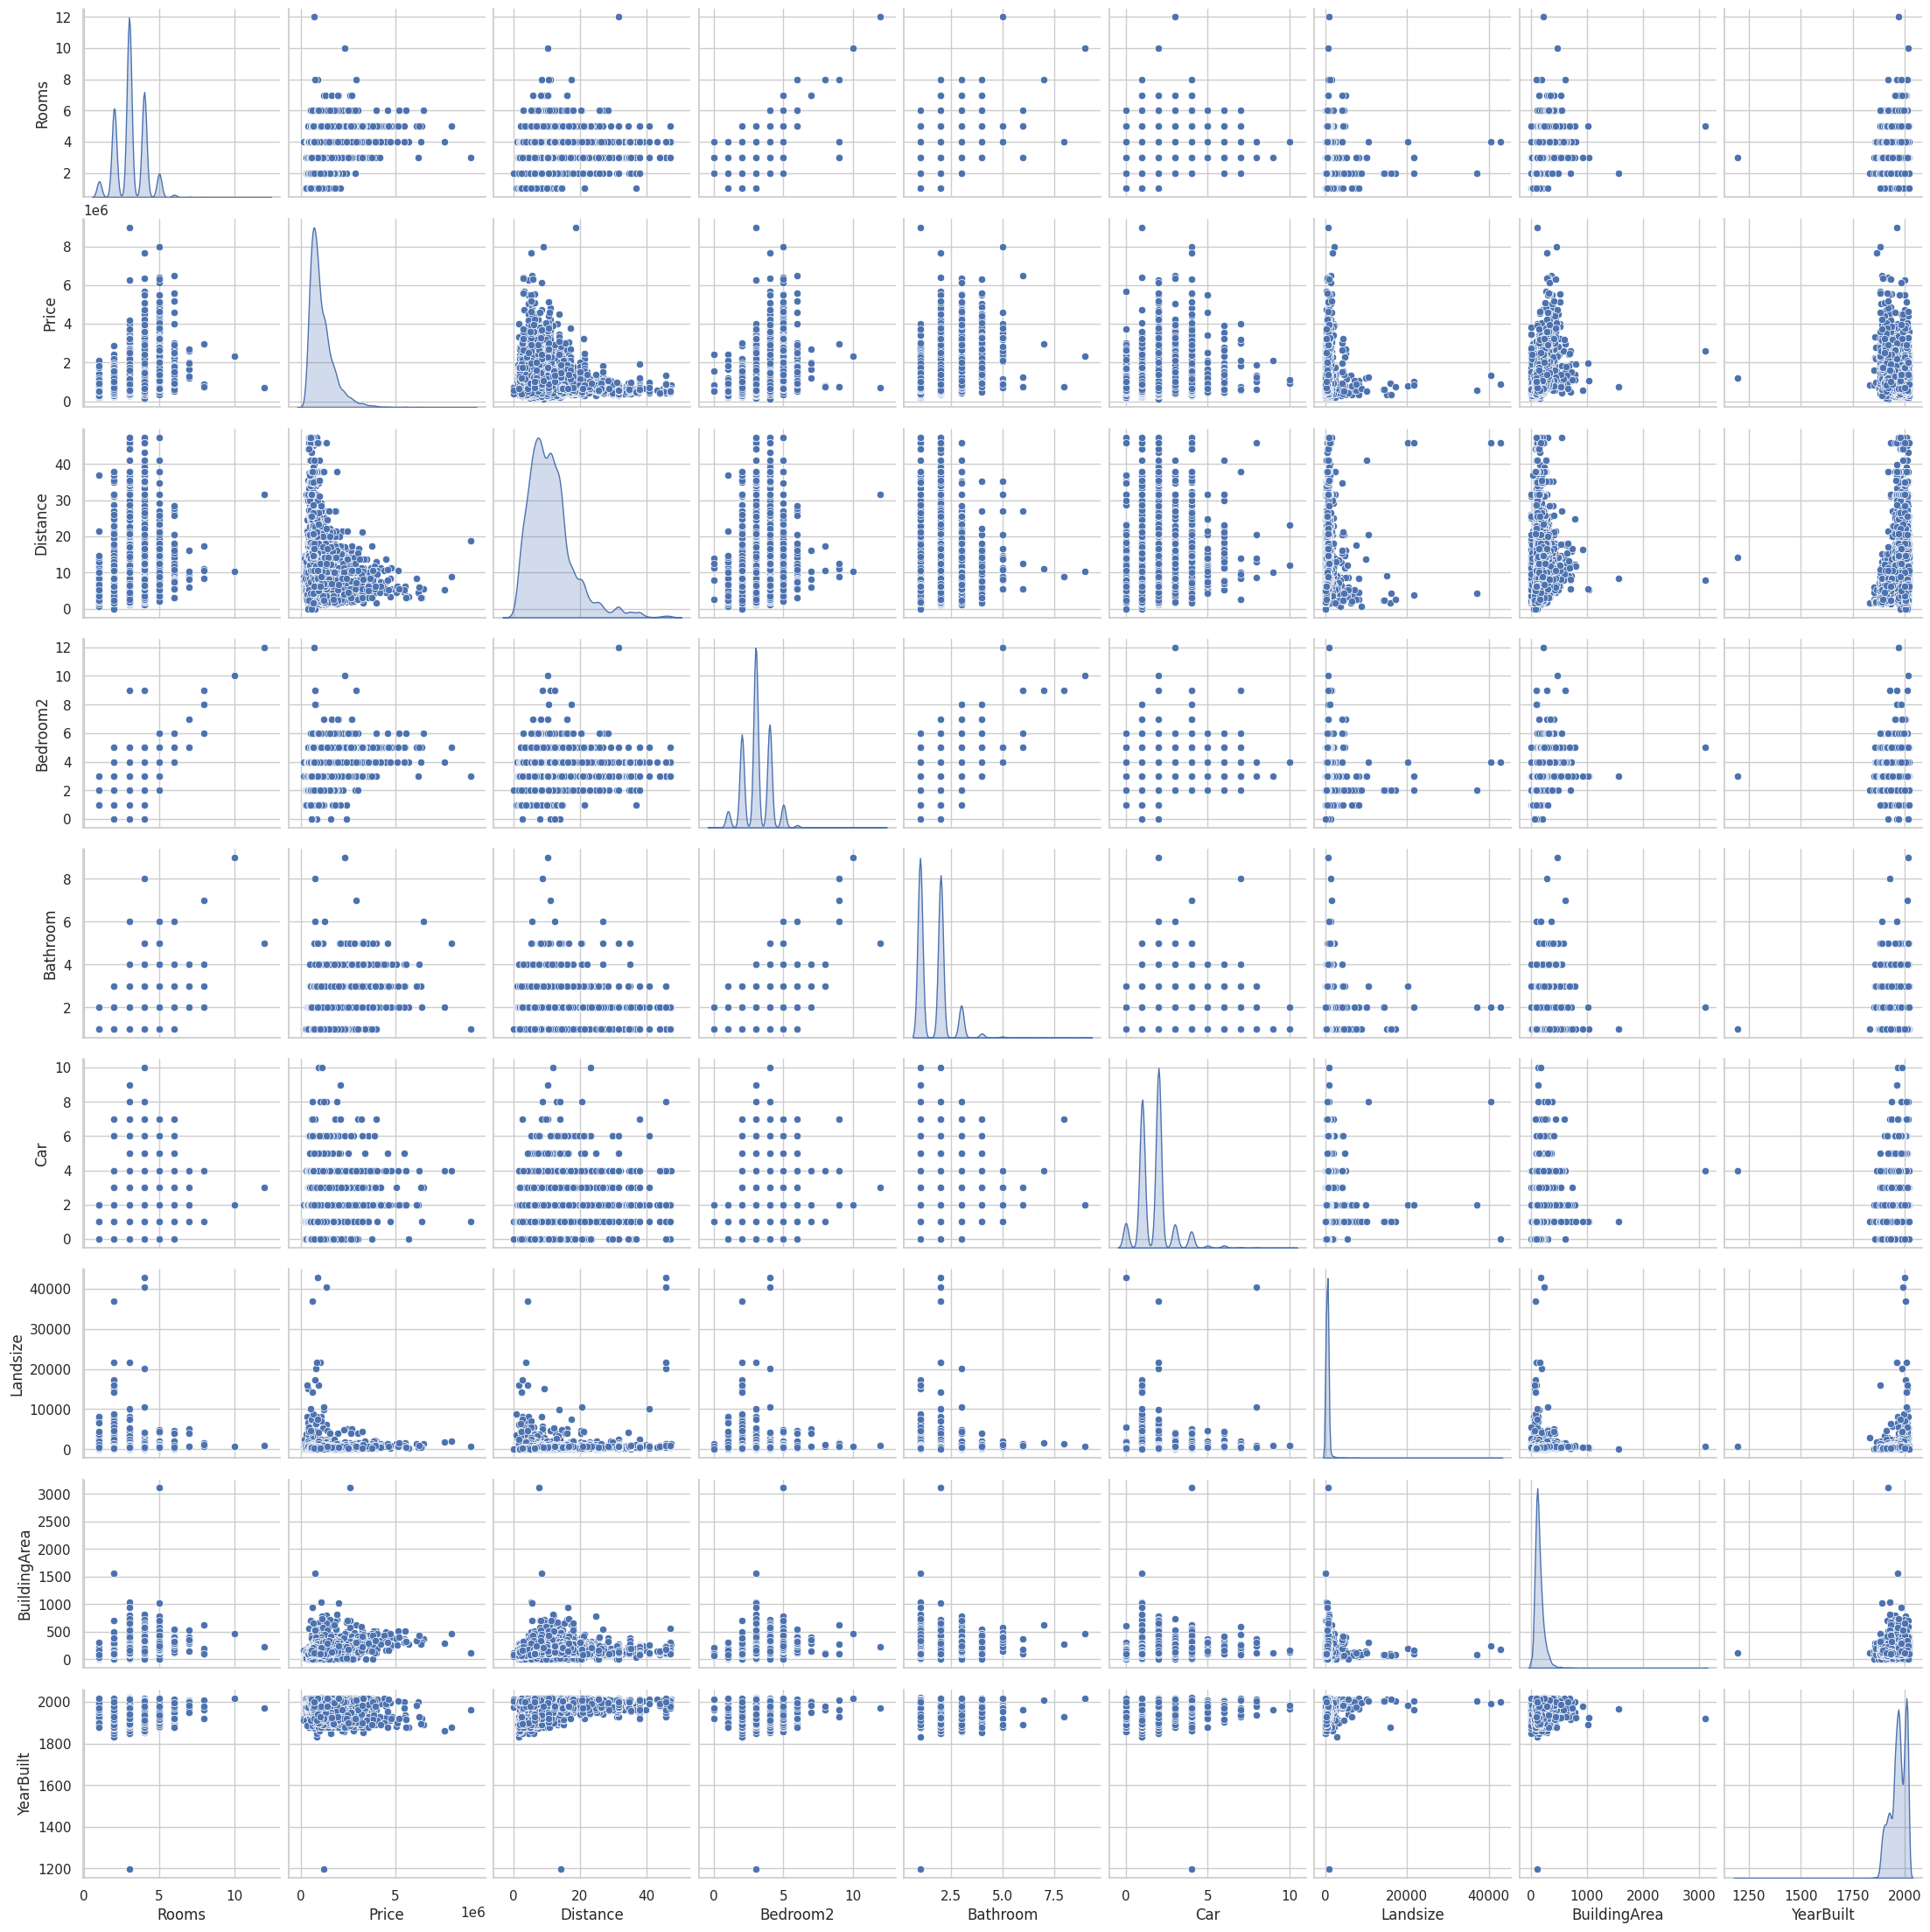

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], kde=True, color='blue')
plt.xlabel('Price')
plt.title('Price Distribution Histogram')
plt.show()

#Show the relationship between numerical variables and price graphically.

num_vars = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
sns.pairplot(df[num_vars], diag_kind='kde', kind='scatter')
plt.show()


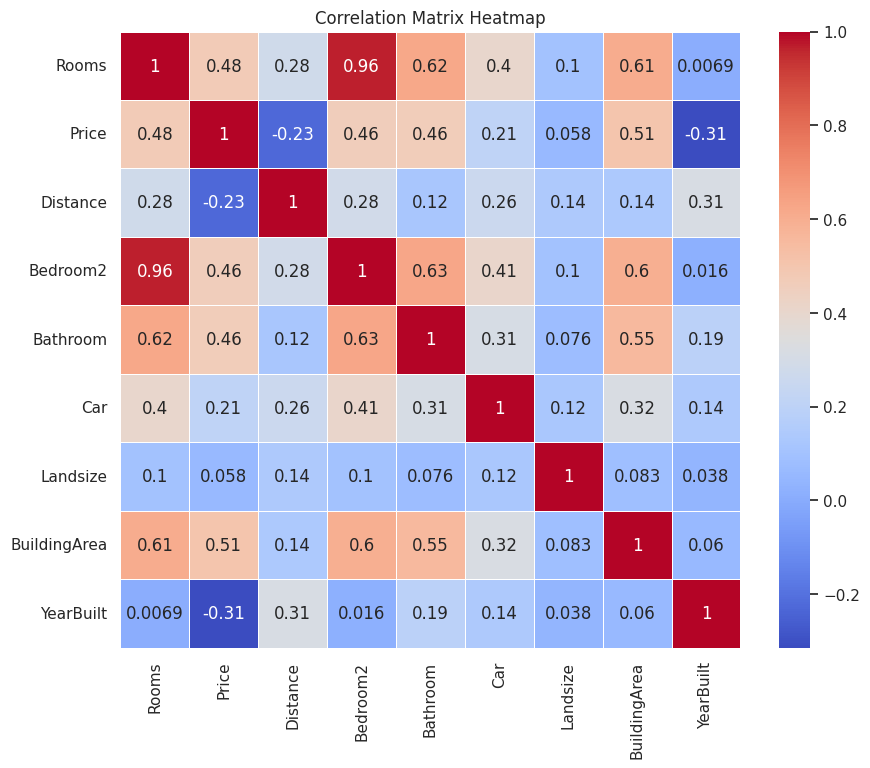

In [ ]:
# Draw a correlation matrix using a heatmap
correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Label Encoder

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,4.000,2.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,8/10/2016,2.500,3067.000,2.000,1.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000


In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,4.000,2.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,8/10/2016,2.500,3067.000,2.000,1.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000


Since it is not a variable with 2 different properties, the label encoder would not make much sense. Because it will be difficult to know which number we gave to which one. One-hot encoder should be used instead.

One-Hot Encoder

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
print(f"One Hot Encoder Columns: {ohe_cols}")

One Hot Encoder Columns: ['Rooms', 'Type', 'Method', 'Bathroom', 'Regionname']


In [ ]:
one_hot_encoder(df, ohe_cols).head()

,Suburb,Address,Price,SellerG,Date,Distance,Postcode,Bedroom2,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Rooms_12,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_7.0,Bathroom_8.0,Bathroom_9.0,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,Abbotsford,25 Bloomburg St,1035000.000,Biggin,4/02/2016,2.500,3067.000,2.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,4019.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,1465000.000,Biggin,4/03/2017,2.500,3067.000,3.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,4019.000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,Abbotsford,55a Park St,1600000.000,Nelson,4/06/2016,2.500,3067.000,3.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,4019.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11,Abbotsford,124 Yarra St,1876000.000,Nelson,7/05/2016,2.500,3067.000,4.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,4019.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,Abbotsford,98 Charles St,1636000.000,Nelson,8/10/2016,2.500,3067.000,2.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,4019.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**MODEL SELECTION**

Set up test and training sets with cross validation.

In [ ]:
X = df.drop('Price', axis=1)  # Independent Variables
y = df['Price']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

Machine learning models:

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

**Since the models cannot understand string data(of course NaN too), we must convert them to numerical data.**

-Fill NaN values with mean in numeric variables

In [ ]:
def fill_na_in_numeric_columns(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        mean_value = dataframe[col].mean()
        dataframe[col].fillna(mean_value, inplace=True)
    return dataframe

In [ ]:
df = fill_na_in_numeric_columns(df)

Non-numeric columns that we will convert with an encoder:

In [ ]:
convert_cols = []
for col in df.columns:
    if col not in num_cols:
        convert_cols.append(col)

print(convert_cols)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [ ]:
def convert_string_columns(dataframe):
    label_encoder = LabelEncoder()

    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = label_encoder.fit_transform(dataframe[col])

    return dataframe

In [ ]:
df = convert_string_columns(df)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,3922,2,0,1035000.000,1,22,62,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,31,-37.808,144.993,2,4019.000
4,0,6458,3,0,1465000.000,3,22,63,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,31,-37.809,144.994,2,4019.000
6,0,6960,4,0,1600000.000,4,147,64,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,31,-37.807,144.994,2,4019.000
11,0,1374,3,0,1876000.000,1,147,69,2.500,3067.000,4.000,2.000,0.000,245.000,210.000,1910.000,31,-37.802,144.999,2,4019.000
14,0,8740,2,0,1636000.000,1,147,74,2.500,3067.000,2.000,1.000,2.000,256.000,107.000,1890.000,31,-37.806,144.995,2,4019.000


In [ ]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

In [ ]:
from sklearn.metrics import mean_absolute_error   #import for absolute error


for model_name, model_params in models.items():
    model = model_params['model']
    print(f"\n ####### {model_name} #######")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

#MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")

#RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

#MAE

    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae}")



 ####### Lasso #######
MSE: 155643754539.8615
RMSE: 394517.11564881634
MAE: 267583.9900504626

 ####### LinearRegression #######
MSE: 155644605661.94937
RMSE: 394518.19433576113
MAE: 267585.4162850778

 ####### Ridge #######
MSE: 155623348234.3531
RMSE: 394491.25241803913
MAE: 267489.9688516974

 ####### ElasticNet #######
MSE: 174839526334.89792
RMSE: 418138.1665608844
MAE: 279920.07779552875

 ####### KNeighborsRegressor #######
MSE: 145951898288.99484
RMSE: 382036.5143399186
MAE: 230885.8572553431

 ####### RandomForestRegressor #######
MSE: 70012369630.12808
RMSE: 264598.50647750846
MAE: 154309.43024827255

 ####### GradientBoostingRegressor #######
MSE: 76005132662.96002
RMSE: 275690.2839473311
MAE: 168216.2855184594

 ####### AdaBoostRegressor #######
MSE: 176885349705.68356
RMSE: 420577.4003743943
MAE: 303463.89385489875


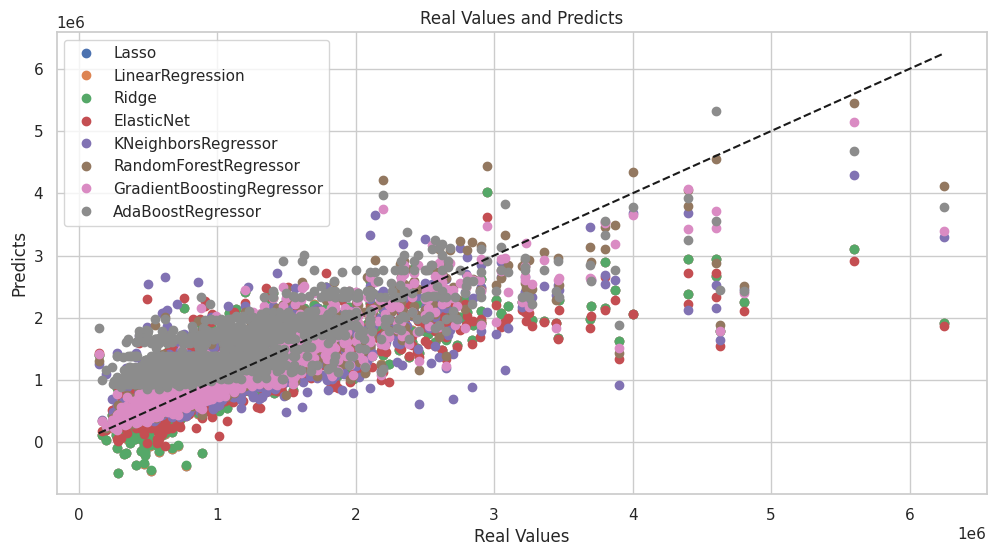

In [ ]:
def plot_model_predictions(models, X_test, y_test):
    plt.figure(figsize=(12, 6))

    for model_name, model in models.items():
        predictions = model.predict(X_test)
        plt.plot(y_test, predictions, 'o', label=model_name)

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
    plt.xlabel("Real Values")
    plt.ylabel("Predicts")
    plt.legend()
    plt.title("Real Values and Predicts")


lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

gboost_reg = GradientBoostingRegressor()
gboost_reg.fit(X_train, y_train)

adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train, y_train)


models = {
    'Lasso': lasso_model,
    'LinearRegression': linear_reg,
    'Ridge': ridge,
    'ElasticNet': elasticnet,
    'KNeighborsRegressor': knn,
    'RandomForestRegressor': rf_reg,
    'GradientBoostingRegressor': gboost_reg,
    'AdaBoostRegressor': adaboost_reg,
}

plot_model_predictions(models, X_test, y_test)